# Car Price Prediction Project
## Table Of Contents
* Introduction
* Import libraries and dataset
* Data Preprocessing
* Exploratory Data Analysis
    - Visualization
        + Regression plots
        + Box plots
    - Pearson Coefficient
    - Analysis of Variance
* Model development
    - Simple Lienar Regression
    - Multiple Linear Regression
    - Polynomial Regression
* Model evaluation using visualization
    - Regression plot
    - Residual Plot
    - Distribution Plot
* Pipelines
* In-Sample Model Evaluation
    - R^2
    - Mean Squareroot Error
* Out-of-Sample Model Evaluation
    - Training and testing
    - Cross-Validation
    - Overfitting, underfitting, and model selection
    - Ridge Regression
    - Grid search
* Conclusion
* Author tributes

## Introduction
This Project is a demonstration of the use of Python Language in a real-life scenario. It will cover themes such as importing necessary libraries, loading data, data preprocessing, and creating models to understand differnt data aspects of model development and evaluation. There is use of visualization in exploratory data analysis as well as model evaluation.
I worked on this project for educational and recreational purposes: it is not meant to be a recommendation for the pricing of cars, or commercial, or academic, reference. 
You can find more information about the dataset and download it [here](https://archive.ics.uci.edu/dataset/10/automobile).

In [92]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from scipy import stats

%matplotlib inline


In [2]:
#UCI datasets do not have a header but it is described in the dataset description page, and can be downloaded as a .name file
# we will enter the headers manually
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
#Create a dataframe containing the data.
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', names = headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Data Preprocessing

In [3]:
df.shape

(205, 26)

In [4]:
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 26 entries, symboling to price
dtypes: float64(5), int64(5), object(16)
memory usage: 41.8+ KB


In [5]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [7]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [8]:
#replace missing values '?' with 'NaN'
df.replace('?', np.nan, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
#detect missing data
missing_data = df.isnull()
missing_data.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [10]:
#make a count of missing data
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [11]:
#We find the mean of the normalized losses column and replace missing values with that in df
norm_losses_mean = df['normalized-losses'].astype(float).mean()

In [12]:
df['normalized-losses'].replace(np.nan, norm_losses_mean, inplace=True)

In [13]:
#We find the mean of the bore column and replace missing values with that in df
bore_mean = df['bore'].astype('float').mean()

In [14]:
df['bore'].replace(np.nan, bore_mean, inplace=True)

In [15]:
##We find the mean of the stroke column and replace missing values with that in df
stroke_mean = df['stroke'].astype(float).mean()
df['stroke'].replace(np.nan, bore_mean, inplace = True)

In [16]:
##We find the mean of the horsepower column and replace missing values with that in df
hsp_mean = df['horsepower'].astype(float).mean()
df['horsepower'].replace(np.nan, hsp_mean, inplace=True)

In [17]:
##We find the mean of the peak-rpm column and replace missing values with that in df
peakrpm_mean = df['peak-rpm'].astype(float).mean()
df['peak-rpm'].replace(np.nan, peakrpm_mean, inplace = True)

In [18]:
#.valuecounts method shows how many values of each type there are
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [19]:
#,idmax(d method shows which is the mode of the categoriacal values
df['num-of-doors'].value_counts().idxmax()

'four'

In [20]:
#we use the .value_counts and .idmax() methods to replace missing categorical data
df['num-of-doors'].replace(np.nan, (df['num-of-doors'].value_counts().idxmax()), inplace = True)

In [21]:
#and we drop rows that do not have proce data
df.dropna(subset = ['price'], axis =0, inplace = True)

In [22]:
#Finally reset the index because we have dropped rows
df.reset_index(drop = True, inplace = True)

In [23]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [24]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [25]:
#we use .astype method to change data type
df[["bore", "stroke", "price", "peak-rpm"]] = df[["bore", "stroke", "price", "peak-rpm"]].astype("float")
df[["normalized-losses", "horsepower"]] = df[["normalized-losses", "horsepower"]].astype("int")

In [26]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.258353,10.164279,103.402985,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316212,4.004965,37.365650,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


### Data Standardization
This invlolves converting data into a common format to make meaningful comparison

In [27]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [28]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['highway-L/100km'] = 235/df["highway-mpg"]

# check your transformed data 
df.head()# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['highway-L/100km'] = 235/df["highway-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


### Binning
The distribution of a continuous variable can be represented using a histogram. Alternatively, =you can convert a continuous variable into a categorical variable by using the pandas cut method and represent it using a barplot. You cn do this to simplify the visualization or standardize data.
We will use the binning method on horsepower to go from a continuous type to a categorical type.

Text(0.5, 1.0, 'Horsepower Distribution amongst the cars')

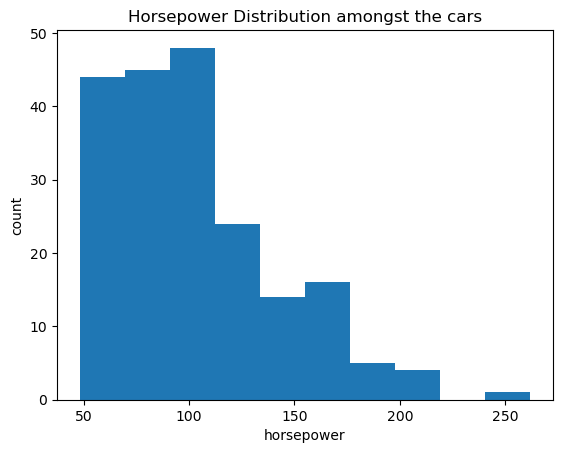

In [29]:
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("Horsepower Distribution amongst the cars")

In [30]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [31]:
group_names = ['Low', 'Medium', 'High']

In [32]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [33]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

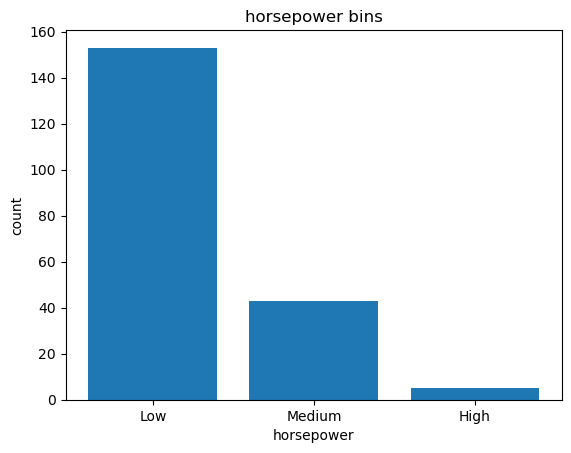

In [34]:
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

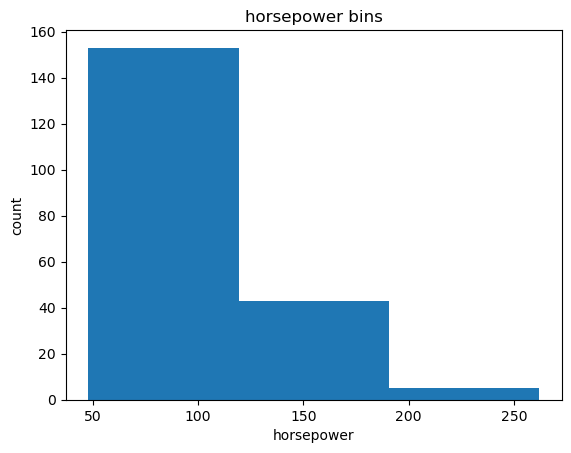

In [35]:
# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

#This histogram has a similar appearance to the barchart we created in the previous cell

### Dummy Variable / indicator variable
It is useful when we need to work with categorical data

In [36]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

In [37]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [38]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [39]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

df['aspiration'].value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [40]:
#Create dummies for aspiration
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns ={'std':'std aspiration', 'turbo':'turbo aspiration'}, inplace = True)
dummy_variable_2.tail()

,std aspiration,turbo aspiration
196,1,0
197,0,1
198,1,0
199,0,1
200,0,1


In [41]:
df = pd.concat([df, dummy_variable_2], axis = 1)
df.drop('aspiration', axis = 1, inplace = True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,std aspiration,turbo aspiration
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,171.2,65.5,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,176.6,66.2,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,176.6,66.4,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


In [42]:
df.to_csv('clean_df.csv')

## Exploratory Data Anaalysis
The goal of this stage is to understand our data better. The question we seek to answer is which variables are important in determining the price. We will use three stastitical tools for this: Visualisation, Pearson Correlation, and Analysis of Variance. 
For visualisation, we will use scatter plots with a line of regression to visualize continuous numerical variables, and box plots to visualize discreete categorical variables. For the scatter plot with a regression line, we will pick the variables that have a strong positive linear relationship or negative linear relationship . For boxplots, we pick the variables whose boxplots do not overlap.
The Pearson Correlation method is used to measure linear dependence between two continuous numerical variables. If the linear dependence between price and another continuous variable is high, the variable is a good predictor of price. We will choose variables with a p-value < 0.05, and correlation coefficient > 0.2 or < -0.2.
In the ANOVA analysis, we choose variables with f-test value > 5, and p-value < 0.05.

### Visualization

In [43]:
#undersand what type of variables you are dealing with
df.dtypes

symboling               int64
normalized-losses       int32
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int32
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
city-L/100km          float64
highway-L/100km       float64
horsepower-binned    category
fuel-type-diesel        uint8
fuel-type-gas           uint8
std aspiration          uint8
turbo aspiration        uint8
dtype: object

#### Correlation between continuous numerical variables
We start with the sns regplot which is a scatterplot with a regression line.

##### Engine size and Price

<Axes: xlabel='engine-size', ylabel='price'>

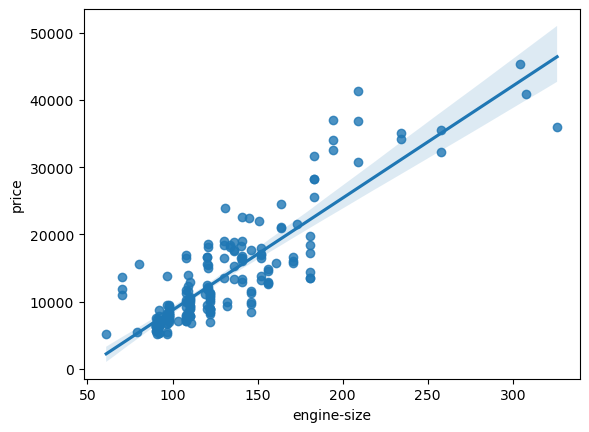

In [47]:
sns.regplot(x='engine-size', y='price', data = df)


The visual representation of the regression shows a strong positive correlation between engine sieze and price. Engine size is a good predictor of price. We can confirm this using the pandas method corr which returns a correlation matrix showing values of the pearson's coefficient of correlation.

In [48]:
#using the correlation test:
df[['engine-size', 'price']].corr()

#Strong positive correlation from both the graphical representation and the correlation test

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


##### Highway-mpg and price


<Axes: xlabel='highway-mpg', ylabel='price'>

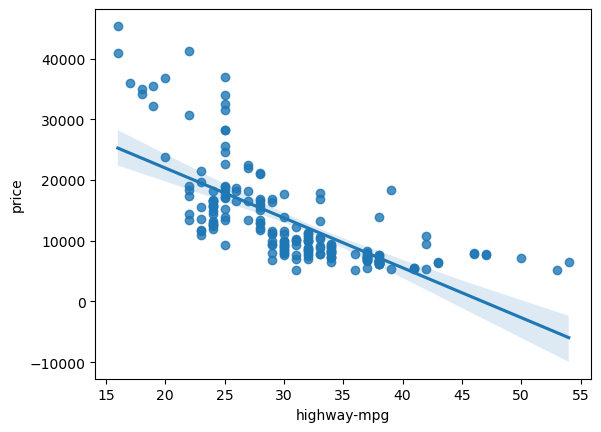

In [50]:
#test correlation between high miles per gallon and price
sns.regplot(x='highway-mpg', y='price', data = df)

There is a strong negative correlation between highway miles per galon and price as seen in the graph above. We can confirm this using the pandas corr() method.

In [51]:
#Using the .corr method
df[['highway-mpg', 'price']].corr()

#Strong negative relationshp means that highway-mpg is a good predictor of price

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


##### peak-rpm and price

<Axes: xlabel='peak-rpm', ylabel='price'>

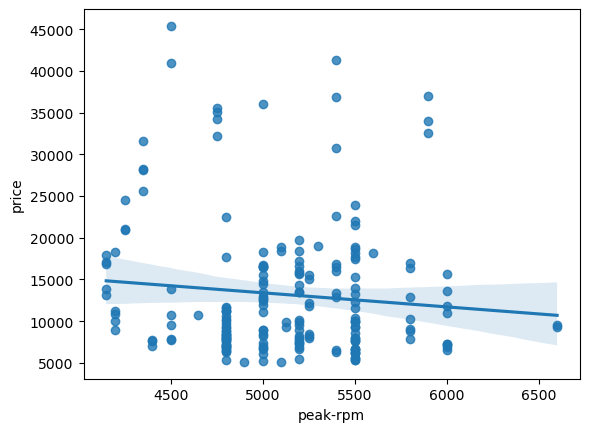

In [52]:
#test correlaition between peak-rpm and price
sns.regplot(x='peak-rpm', y='price', data = df)


The correlatiob between price and peak revolutions per minute is too weak. This variable is not a good predictor of price.

In [53]:
#using the .corr method
df[['peak-rpm', 'price']].corr()
#weak relationship means that peak-rpm is not a good predictor of price

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


##### stroke and price

<Axes: xlabel='stroke', ylabel='price'>

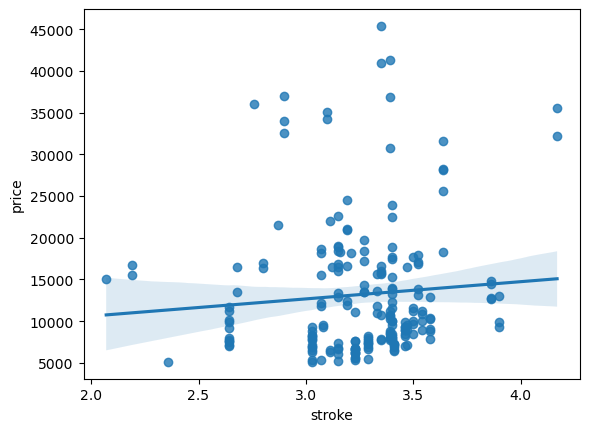

In [55]:
#visualising the relationship between stroke and price
sns.regplot(x='stroke', y='price', data = df)


This visualization shows a weak correlation between stroke and price. We will confirm using the pandas corr() method.

In [56]:
#using the .corr method
df[['stroke', 'price']].corr()
#weak positive relationship

,stroke,price
stroke,1.000000,0.082116
price,0.082116,1.000000


#### Visualizing categorical data to understand correlation
Categorical data has types 'object' or 'int64'. We will use boxplots to visualize

##### Body style and price

<Axes: xlabel='body-style', ylabel='price'>

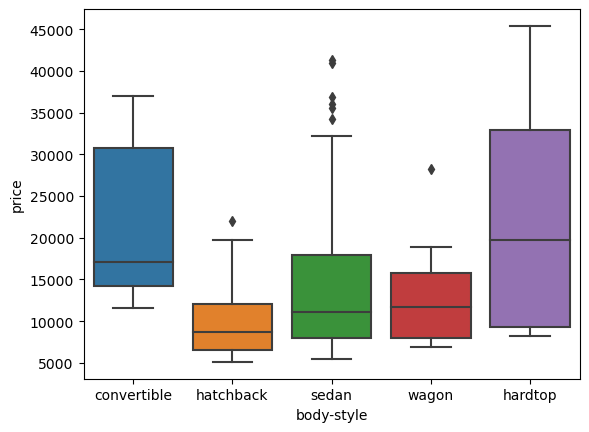

In [59]:
#relationship between bodystyle and price
sns.boxplot(x='body-style', y='price', data =df)

A lot of overlap implies that body-style is not a good predictor of price.

##### Engine location and price

<Axes: xlabel='engine-location', ylabel='price'>

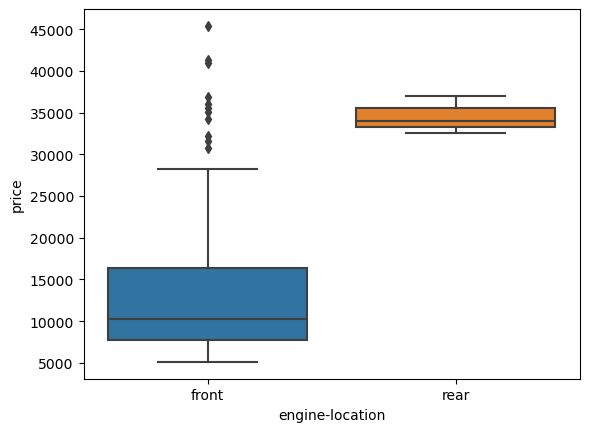

In [60]:
#Next we examine engine-location and pric
sns.boxplot(x='engine-location', y='price', data = df)


 A significant difference shows that engine location is a good predictor of price

##### Drive Wheels and Price

<Axes: xlabel='drive-wheels', ylabel='price'>

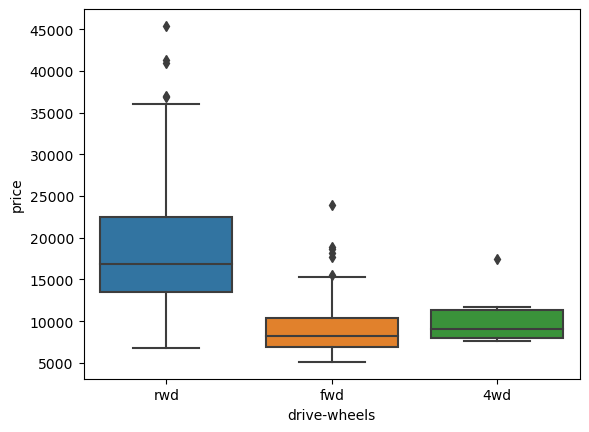

In [62]:
#we shall also ecamine drivev-wheels and price
sns.boxplot(x='drive-wheels', y='price', data = df)


rwd is clelarly different, but fwd and fwd have a strong overlap. There is an ambiguity. If we do not have enough of better predictors, we might conisder using this variable.

### Descriptive Statistical Analysis

In [63]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,std aspiration,turbo aspiration
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.258353,...,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316212,...,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,...,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


In [64]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


In [65]:
#pandas value_count shows how many units of each variable we have but works only on series
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [67]:
#we can convert to dataframe using the to.frame emthod
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [68]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [69]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [70]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head()

,value_counts
engine-location,
front,198
rear,3


#### Basics of Grouping
Data is grouped using the groupby() method based on one or several variables and analysis is prformed on individual groups

In [72]:
# grouping results
df_group_one = df[['drive-wheels','price']]
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [75]:
    # grouping results
    df_gptest = df[['drive-wheels','body-style','price']]
    grouped_test1 = df_gptest.groupby(['drive-wheels', 'body-style'],as_index=False).mean()
    grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [76]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [77]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [78]:
# grouping results
df_group_two = df[['body-style','price']]
df_group_two = df_group_two.groupby(['body-style'],as_index=False).mean()
df_group_two

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


Using a heatplot to visualize relationship btn body-style and price
Use the grouped results dataframe.

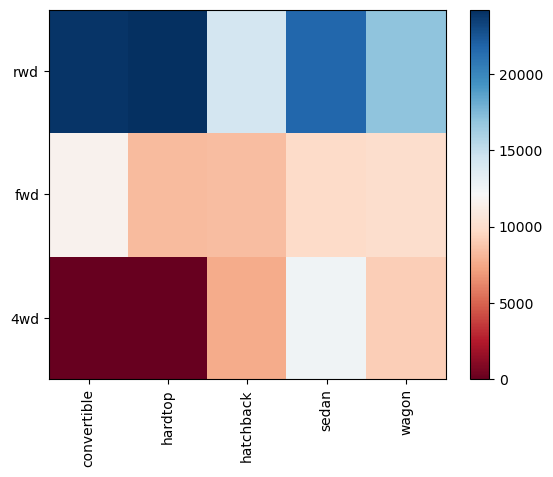

In [91]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

###  Pearson Correlation
This is the default correlation metric called by the method .corr().
In addition to the correlation coefficient, we can also get a p-value which is the stastistical significance of the correlation.
A p-value of <0.05 is the standard choice. It means that the correlation is 95% significant. The smaller the p-value hte greater the stastistical significance.
We can use the stats module from the scipy liibrary to call the .peasrsonr method taht returs a correlation coefficient and a p-value.

In [93]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732947e-20


In [94]:
stats.pearsonr(df['horsepower'], df['price'])
#horsepower is a good predictor for price because the correlation coefficient is high and the p-value is low


PearsonRResult(statistic=0.8096068016571054, pvalue=6.273536270650436e-48)

Horsepower is a good predictor for price because the correlation coefficient is high and the p-value is low

In [95]:
stats.pearsonr(df['length'], df['price'])


PearsonRResult(statistic=0.6906283804483642, pvalue=8.016477466158917e-30)

Moderately strong correlation but the stastistical significance is high, worthwhile predictor

In [96]:
stats.pearsonr(df['width'], df['price'])

PearsonRResult(statistic=0.7512653440522674, pvalue=9.200335510481426e-38)

Correlation coefficient is high and p-value is small making width a good predicor of price

In [97]:
stats.pearsonr(df['curb-weight'], df['price'])

PearsonRResult(statistic=0.8344145257702844, pvalue=2.189577238893972e-53)

Correlation coefficient is high and p-value is small making width a good predicor of price

In [98]:
stats.pearsonr(df['engine-size'], df['price'])

PearsonRResult(statistic=0.8723351674455182, pvalue=9.265491622200262e-64)

The p-value < 0.001 so the correlation between engine-size and price is stastistically significant and the relationship is strong so engine size is a good predictor for price.

In [99]:
stats.pearsonr(df['bore'], df['price'])

PearsonRResult(statistic=0.5431553832626603, pvalue=8.04918948393533e-17)

The p-value < 0.001 so the correlation between bore and price is stastistically significant and the relationship is moderately strong. Bore is an acceptable predictor of price.

In [100]:
stats.pearsonr(df['city-mpg'], df['price'])

PearsonRResult(statistic=-0.6865710067844677, pvalue=2.3211320655676502e-29)

The p-value < 0.001 so the correlation between city-mpg and price is stastistically significant and the relationship is negative and moderately strong. City miles per galon is a good predictor of price.

In [101]:
stats.pearsonr(df['highway-mpg'], df['price'])

PearsonRResult(statistic=-0.7046922650589529, pvalue=1.7495471144476325e-31)

The p-value < 0.001 so the correlation between city-mpg and price is stastistically significant and the relationship is negative and strong. This makes highway miles per galon a good predictor of price.

### Analysis of Variance (ANOVA)
This method groups data, assumes that all groups have a simlar mean, and then calculates the deviation from the mean. Applying the formula in Python returns the F-test Score and P-value. If the corellation is strong and significant, the f-test value will be large, and the p-value small.

In [107]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(3)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
136,4wd,7603.0
140,4wd,9233.0


In [106]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

To get the f-test value and the p-value, we use the stats package function f_oneway(). The arguments for the method are the values of the method group. Here we use three groups fwd, rwd, and 4wd.


In [110]:
stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])

F_onewayResult(statistic=67.95406500780399, pvalue=3.3945443577149576e-23)

The p-value is small implying stastistical significance, and the f-test value is high implying strong correlation. Drive_wheels are a good predictor for price. However, are they equaly significant? Let us examine each group separately.

In [111]:
stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])

F_onewayResult(statistic=130.5533160959111, pvalue=2.2355306355677366e-23)

fwd and rwd have a stastistically significant correlation, and the relationship is strong making them a strong predictor of price.

In [112]:
stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('4wd')['price'])

F_onewayResult(statistic=0.6654657502523033, pvalue=0.4162011669784502)

fwd and 4wd are not stastistically significant because they have a high p-value. In addition, the F-test score is small. Therefore, fwd and 4wd are bad predictors of price.

In [113]:
stats.f_oneway(grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])

F_onewayResult(statistic=8.580681368924756, pvalue=0.004411492211225367)

rwd and 4wd are stastistically significant as the p-vale is <0.05. The relationship is less strong than then wd and rwd, but stronger than fwd and 4wd. rwd and 4wd are good predictors of price. While all three together have high F-test score, combining them in pairs shows different results. Since we have other strong predicors, we will shelve drive wheels as a price predictor.

### Conclusion
We now have a better understanding of our data and can coose the important variables for predicting price.
Continuous numerical variables:
* engine size
* highway-mpg
* wheelbase
* horsepower
* length
* width
* curb weight
* engine size
* bore
* city-mpg


Discreete Categorical variables
* engine location
* drive wheels

## Model Development
We will develop and evaluate several models including:
* Simple Linear Model
* Multiple Linear Model

### Simple Linear Regression
The steps involved in the creation of a SLR model are: Creation of a linear regression object, fitting the model to the object, and outputting a prediction. After the model is created, you can use the intercept_ and coef_ classes to check the interface and coefficient.

In [115]:
lm = LinearRegression() #Create linear regression object
lm

LinearRegression()

In [164]:
#make a LR model that uses highway-mpg to predict price
x = df[['highway-mpg']]
y = df['price']

lm.fit(x, y) #Fit the linear model

yhat = lm.predict(x) #Output a predition
yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [117]:
lm.intercept_ #find intercept

38423.3058581574

In [118]:
lm.coef_ #find coefficient

array([-821.73337832])

In [119]:
# Train another model using engine-size as the predictor
lm1 = LinearRegression()

x = df[['engine-size']]
y = df['price']

lm1.fit(x, y)

yhat1 = lm1.predict(x)
yhat1[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [120]:
lm1.intercept_

-7963.338906281024

In [121]:
lm1.coef_

array([166.86001569])

### Multiple Linear Regression

In [135]:
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']] #create a dataframe using multiple good predictors

In [123]:
#use the new object to fit a linear model
lm2 = LinearRegression()
lm2.fit(z, df[['price']])

LinearRegression()

In [124]:
lm2.intercept_

array([-15811.86376773])

In [125]:
lm2.coef_

array([[53.53022809,  4.70805253, 81.51280006, 36.1593925 ]])

In [126]:
# Another mlv using the predictors normalized losses, and highway mpg
z1 = df[['normalized-losses', 'highway-mpg']]
lm2 = LinearRegression()
lm2.fit(z1, df[['price']])
yhat2 = lm2.predict(z1)
yhat2[0:5]

array([[16231.78938339],
       [16231.78938339],
       [17052.24372355],
       [13833.33798916],
       [20396.97271047]])

In [127]:
lm2.intercept_

array([38201.31327246])

In [128]:
lm2.coef_

array([[   1.49789586, -820.45434016]])

## Model Evaluation Using Visualization
Let us test how effective the models we have created are.

### Regression Plot
One technique for evaluating the model is using a scatterplot with a regression line of the fitted model.

(0.0, 48173.759170469544)

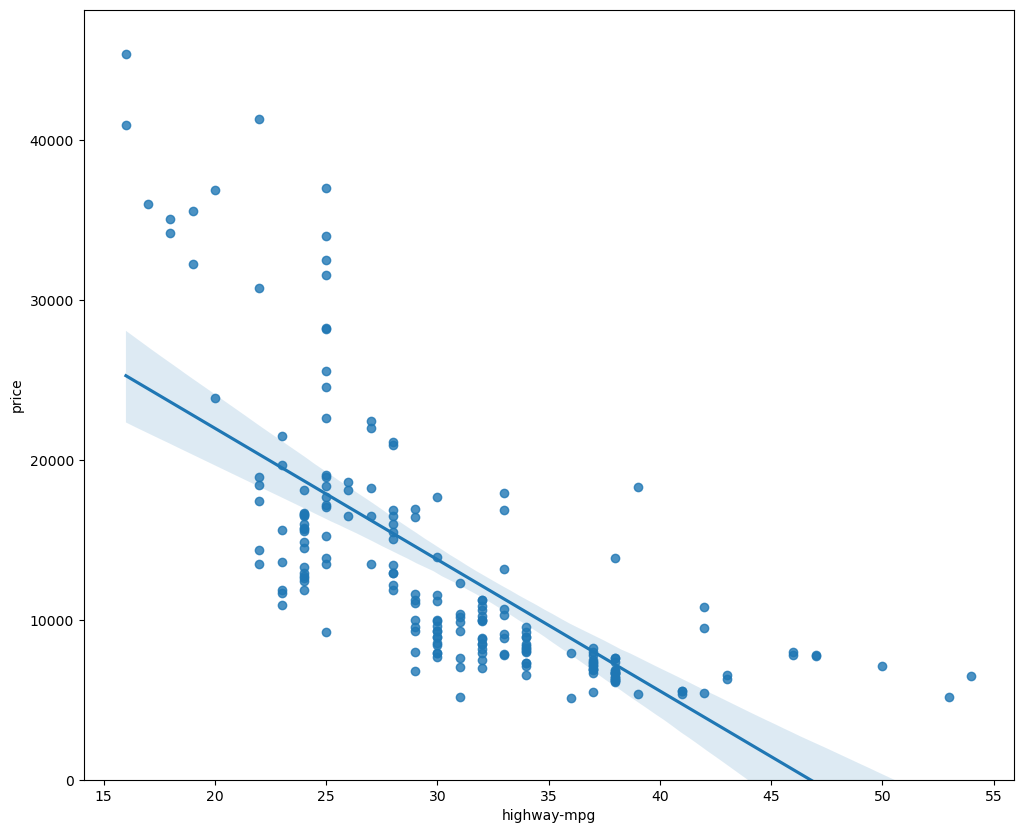

In [130]:
#visualize the highway-mpg 
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

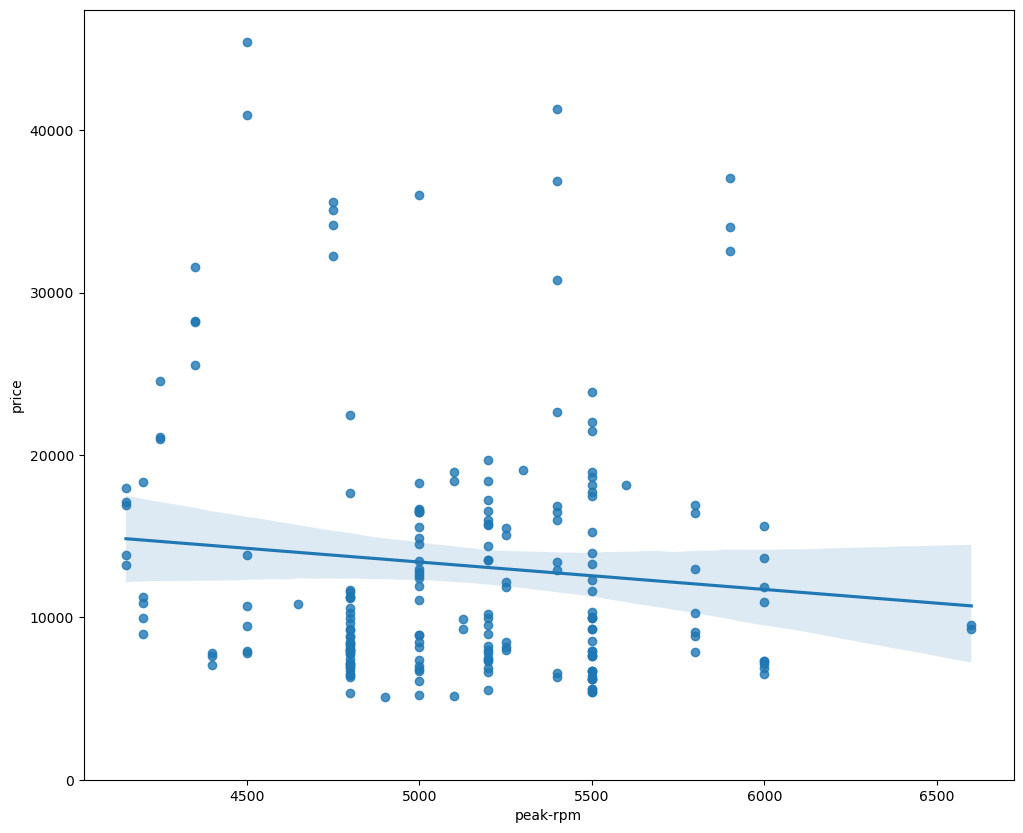

In [131]:
#Now we compare this to a plot of peak-rpm
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

It is clear from the visualization that the highway-mpg predictor has a stronger correlation. Peak rpm is a bad predictor as the visualisation of the regression shows it has a small correlation. However, we can confirm this using the .corr method:

In [132]:
df[['peak-rpm', 'highway-mpg', 'price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


### Residual Plot
On a residual plot, the residual is the distance beteween each point and the fitted regression line. A model is appropriate if the points are randlomly spread out around the x-axis

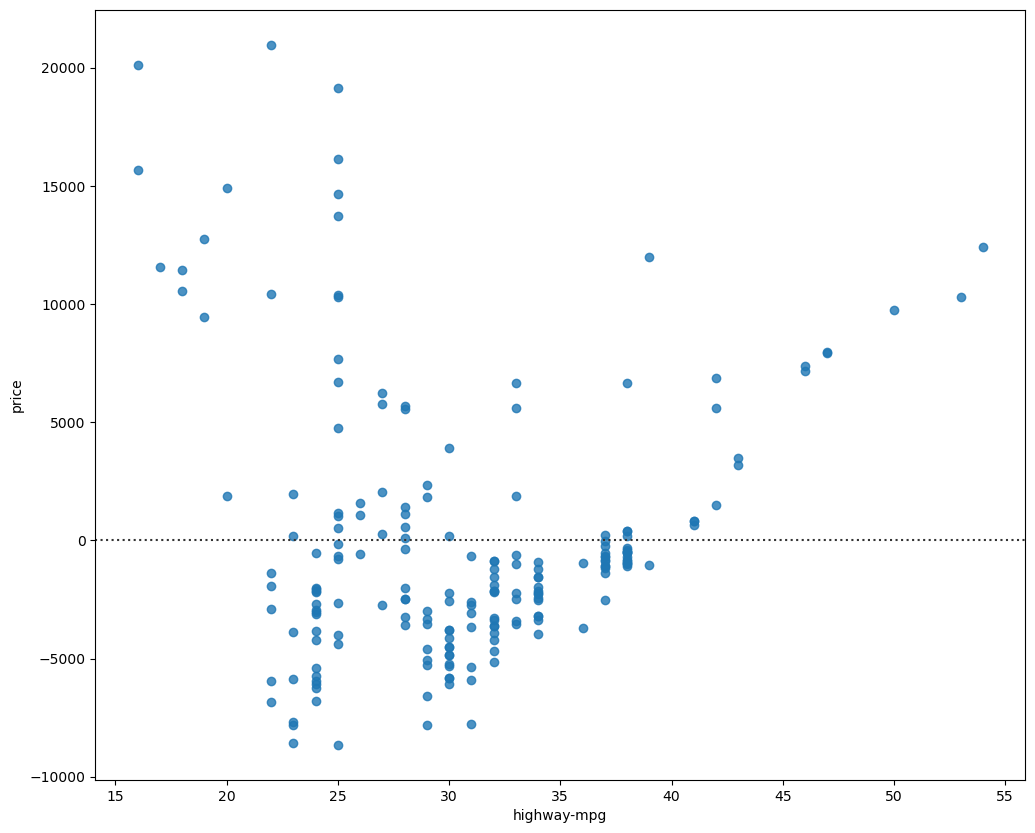

In [133]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

### Distribution plot
We can visualize a MLR using a distribution plot: comparing the distribution of the fitted values and distribution of actual values.

In [137]:
lm2.fit(z, df['price'])
Y_hat = lm2.predict(z)

C:\Users\e.mwenda\AppData\Local\Temp\ipykernel_10960\4196657742.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\e.mwenda\AppData\Local\Temp\ipykernel_10960\4196657742.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

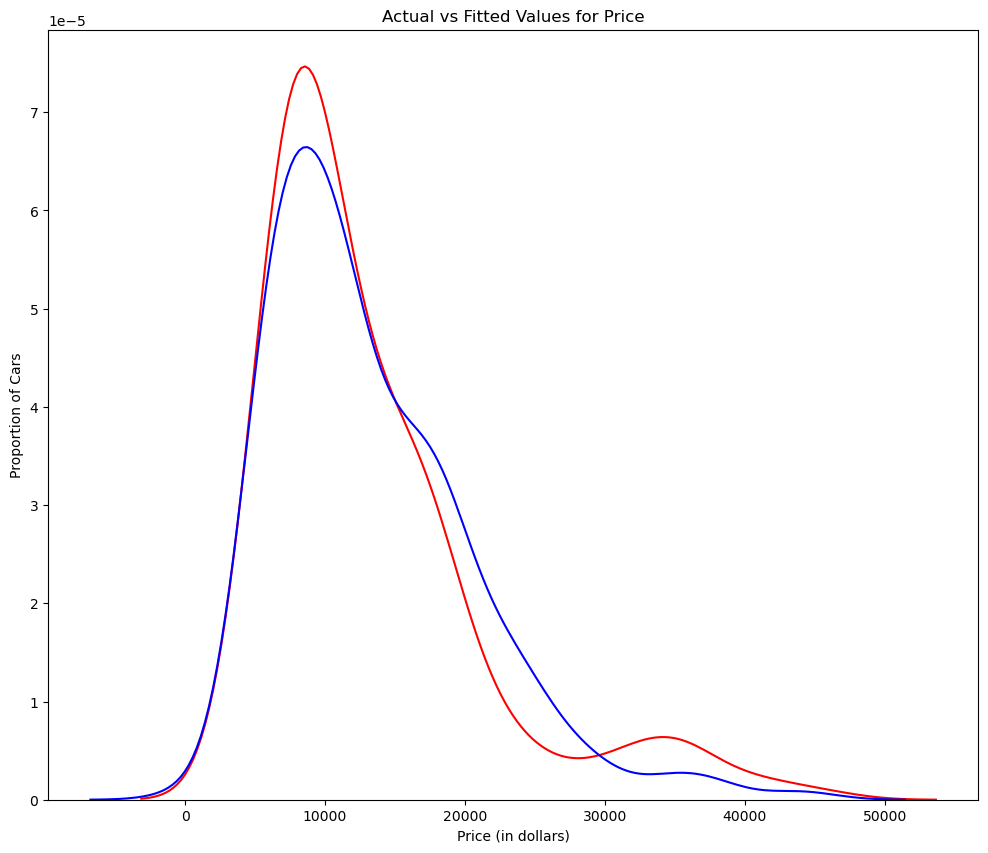

In [138]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## Polynomial Regression
We can model non-linear relationships by setting polynomials of higher degrees.

Let us describe a function that makes a plot showing the training data and the model.

In [140]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Now we will make a polynomial regression model for price using highway mpg as the predictor.

In [143]:
x = df['highway-mpg']
y = df['price']

In [144]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


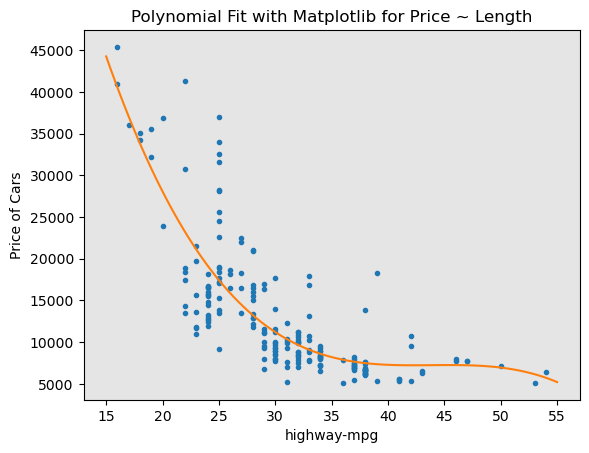

In [145]:
PlotPolly(p, x, y, 'highway-mpg')

The model seems to be a good fit for the data from the graph.
Let us make another model and evaluate it visually.

In [147]:
# Creating a polunomial of order 11
g = np.polyfit(x, y, 11)
q = np.poly1d(g)
print(q)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


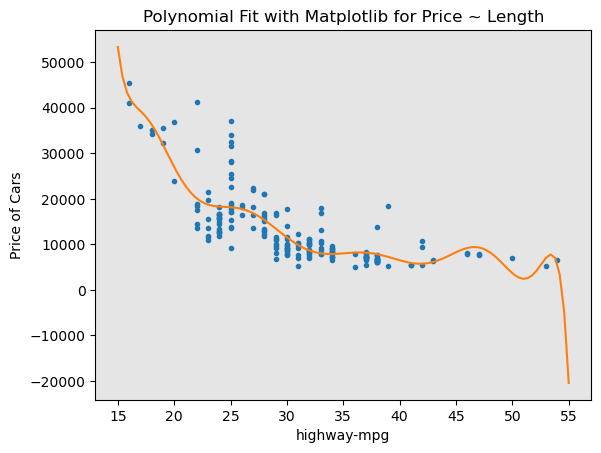

In [148]:
PlotPolly(q, x, y, 'highway-mpg')

This model has been overfitted as the prediction is overly sensitive to small changes in the predictor.

## Pipelines
Data pipelines simplify the process of transforming data. 
We use the modules pipeline from scikit-learn to create a pipeline and standard scaler as a step in the pipeline. We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.


In [154]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [155]:
pipe=Pipeline(Input) #input the list of tuples as an argument to create a pipeline
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [157]:
Z = z.astype(float) #convert the values into float because that is the default input type for standardscaleer()
pipe.fit(Z,y) #simultaneously normalize the data, perform a transform, ad fit the model

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [158]:
ypipe=pipe.predict(Z) #simultaneously normalize the data, perform a transform, and produce a prediction
ypipe[0:4]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955])

In [159]:
#Create a pipeline that standardizes the data, 
#then produce a prediction using a linear regression model using the features Z and target y.

newinput = [('scale', StandardScaler()), ('model', LinearRegression())]
newpipe = Pipeline(newinput)

newpipe.fit(z,y)

ypipe = newpipe.predict(z)
ypipe[0:10]

array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
       15520.90025344, 13869.27463809, 15455.88834114, 15973.77411958,
       17612.7829335 , 10722.47987021])

## Measures for In-Sample Evaluation
Here we shall concern ourselves with quantitative measures of accuracy. There are two important measures: 
* R^2 
* Mean Squared Error

### Model 1: Simple Linear Regression
Let us calculate R^2 and MSE

In [165]:
lm.fit(x,y)
print('The R-Squared is:', lm.score(x,y))

# This means the 49.65% of the variation of price is explained by the SLM 'highway-mpg' fit

The R-Squared is: 0.4965911884339176


In [166]:
y_hat1 = lm.predict(x)
y_hat1[0:4]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ])

In [167]:
#we can compare the predicted results with the actual results
mse = mean_squared_error(df['price'], y_hat1)
print('The mean square error of price and predicted value is: ', mse)


The mean square error of price and predicted value is:  31635042.944639888


### Model 2: Multiple Linear Regression

In [168]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093732522175299


In [169]:
Y_predict_multifit = lm.predict(Z)


In [170]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11979300.349818882


### Model 3: Polynomial Fit

In [171]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)
#we can say 67.4% of the variation of price is explained by the polynomial fir

The R-square value is:  0.6741946663906513


In [172]:
mean_squared_error(df['price'], p(x))

20474146.42636125

# Conclusion
Comparing the three models, the MLR has a higher R^2 and lower MSE than the polynomial and SLR models and is thus the best of the three models.

# Model Evaluation
In the previous section we did an in-sample evaluation using visualization, R squared, and Mean Squareroot Error to see how fitting the model is for the training set of data. In this section, we will use a test data set to evaluate the performance of the algorithm on a new data that has not been used to develop the model. We will also cover overfitting, underfitting, ridge regression, and grid search.

In [173]:
# We get a dataframe with numeric values only from our dataset
dfn = df._get_numeric_data()
dfn.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,std aspiration,turbo aspiration
0,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,5000.0,21,27,13495.0,11.190476,8.703704,0,1,1,0
1,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,5000.0,21,27,16500.0,11.190476,8.703704,0,1,1,0
2,1,122,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,5000.0,19,26,16500.0,12.368421,9.038462,0,1,1,0
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,5500.0,24,30,13950.0,9.791667,7.833333,0,1,1,0
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,5500.0,18,22,17450.0,13.055556,10.681818,0,1,1,0


In [311]:
# Create functions for plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [175]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

### Training and Testing
We start by splitting the data into a training set and a testing set. First we split the predictor variable and the target variable

In [290]:
y_data = df[['price']]
x_data = df.drop('price', axis = 1)

In [291]:
#We split the data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


In [292]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size = 0.40, random_state = 0)

print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])


number of test samples : 81
number of training samples: 120


In [293]:
#We apply a linear regression method
lre = LinearRegression()

lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [294]:
#we calculate R^2 on test data
lre.score(x_test[['horsepower']], y_test)

0.3635480624962413

In [295]:
 #we calculate R^2 on the training data
lre.score(x_train[['horsepower']], y_train)

0.662028747521533

The R^2 is lower on the test data compared to the training data

In [296]:
lrf = LinearRegression()
lrf.fit(x_train1[['horsepower']], y_train1)

LinearRegression()

In [297]:
lrf.score(x_train1[['horsepower']], y_train1)

0.5754853866574969

In [298]:
lrf.score(x_test1[['horsepower']], y_test1)

0.7139737368233016

The R^2 on the 40% split data is much higher on the test data.

### Cross-validation
Sometiems you mught not have enough data and thus cross-validation comes in handy.
We use the function cross_val_score from the module sklearn.model_selection. The inputs are the feature and target variables. The argument cv specifies number of folds. The output is the R^2 value of each fold.

In [299]:
zcross = cross_val_score(lrf, x_data[['horsepower']], y_data, cv = 4)

In [300]:
#this operation returns the R^2 of each fold
zcross

array([0.77465419, 0.51718424, 0.74814454, 0.04825398])

In [301]:
print("The mean of the folds are", zcross.mean(), "and the standard deviation is" , zcross.std())

The mean of the folds are 0.5220592359225417 and the standard deviation is 0.291304806661184


In [302]:
-1 * cross_val_score(lrf,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20251357.7835463 , 43743920.05390439, 12525158.34507633,
       17564549.69976652])

In [303]:
#cross-validation using two folds
cross_val_score(lrf, x_data[['horsepower']], y_data, cv = 2)

array([0.59020493, 0.44346527])

We can use the function cross_val_predict to predict the output.

In [304]:
y_hat = cross_val_predict(lrf, x_data[['horsepower']], y_data, cv = 4)
y_hat[0:5]

array([[14142.23793549],
       [14142.23793549],
       [20815.3029844 ],
       [12745.549902  ],
       [14762.9881726 ]])

## Overfitting, underfitting, and model selection
Out-of-sample data is a better measure of how well the model performs. One reason is becuase of overfitting the in_sample data.
Let us explore a multilinear regression example to demonstrate this problem.

In [305]:
#create a multiple linear regression object and train it using 'horsepower','curb-weight', 'engine-size', 'highway-mpg'
lrg = LinearRegression()
lrg.fit(x_train[['horsepower','curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [306]:
yhat_train = lrg.predict(x_train[['horsepower','curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([[ 7426.34910902],
       [28324.42490838],
       [14212.74872339],
       [ 4052.80810192],
       [34499.8541269 ]])

In [307]:
yhat_test = lrg.predict(x_test[['horsepower','curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([[11349.68099115],
       [ 5884.25292475],
       [11208.31007475],
       [ 6641.03017109],
       [15565.98722248]])

Let us examine the distribution of the predicted values of the training data

C:\Users\e.mwenda\AppData\Local\Temp\ipykernel_10960\1421651474.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\e.mwenda\AppData\Local\Temp\ipykernel_10960\1421651474.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax

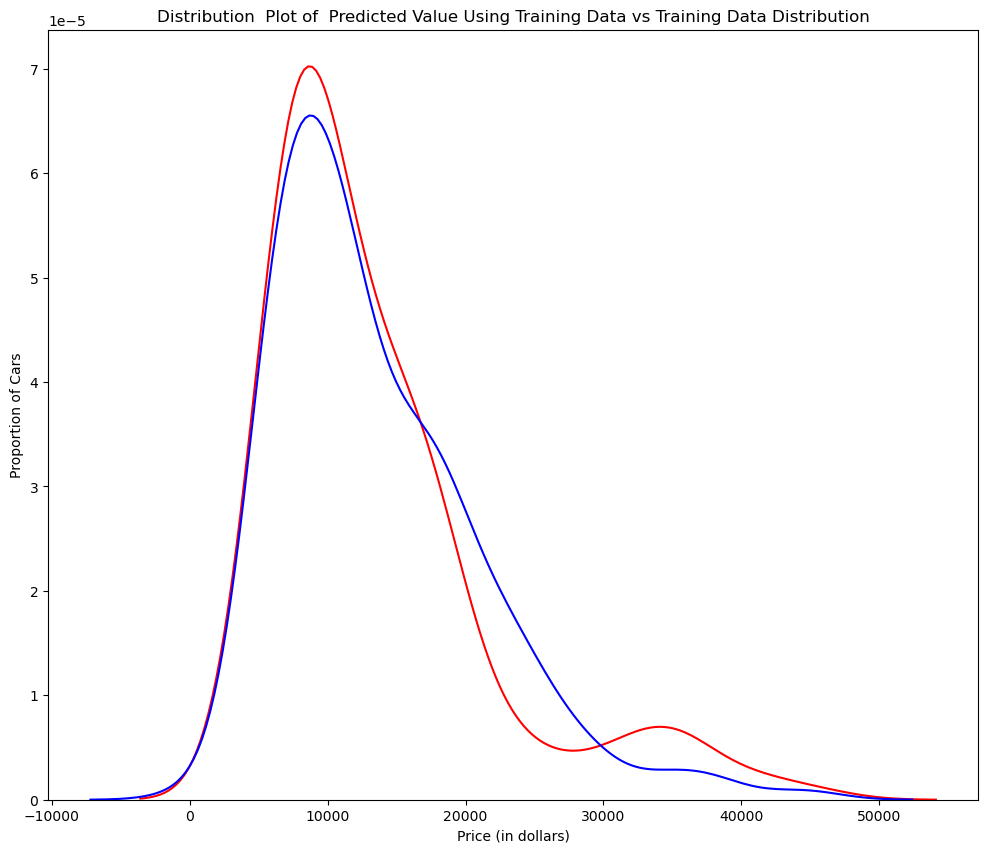

In [312]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

The prediction of the training data looks good. Now let us plot the distribution of the test data prediction.

C:\Users\e.mwenda\AppData\Local\Temp\ipykernel_10960\1421651474.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\e.mwenda\AppData\Local\Temp\ipykernel_10960\1421651474.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax

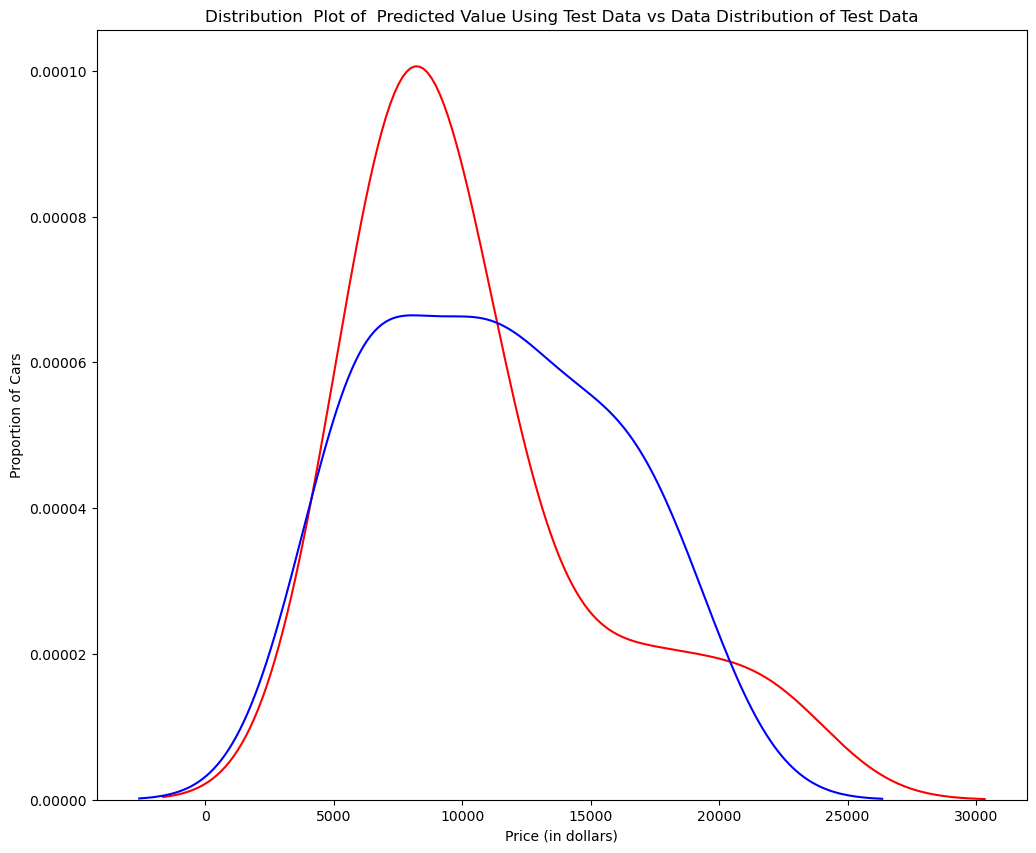

In [313]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

The model did well predicting the in_sample data but performs poorly when new data is introduced.
Let us try a polynomial regression and compare the prediction accuracy.


In [314]:
#make a 55 % plit for the training data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.45, random_state=0)

In [315]:
#perform a degree 5 polynomial transformation on the feature 'horsepower'.
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [316]:
#next we create a linear regression and train it
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [317]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([[ 6727.58267154],
       [ 7306.70989608],
       [12213.7082022 ],
       [18895.03221601],
       [19996.83388031]])

In [318]:
#compapre predicted values to the actual values
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [[ 6727.58267154]
 [ 7306.70989608]
 [12213.7082022 ]
 [18895.03221601]]
True values: [[ 6295.]
 [10698.]
 [13860.]
 [13499.]]


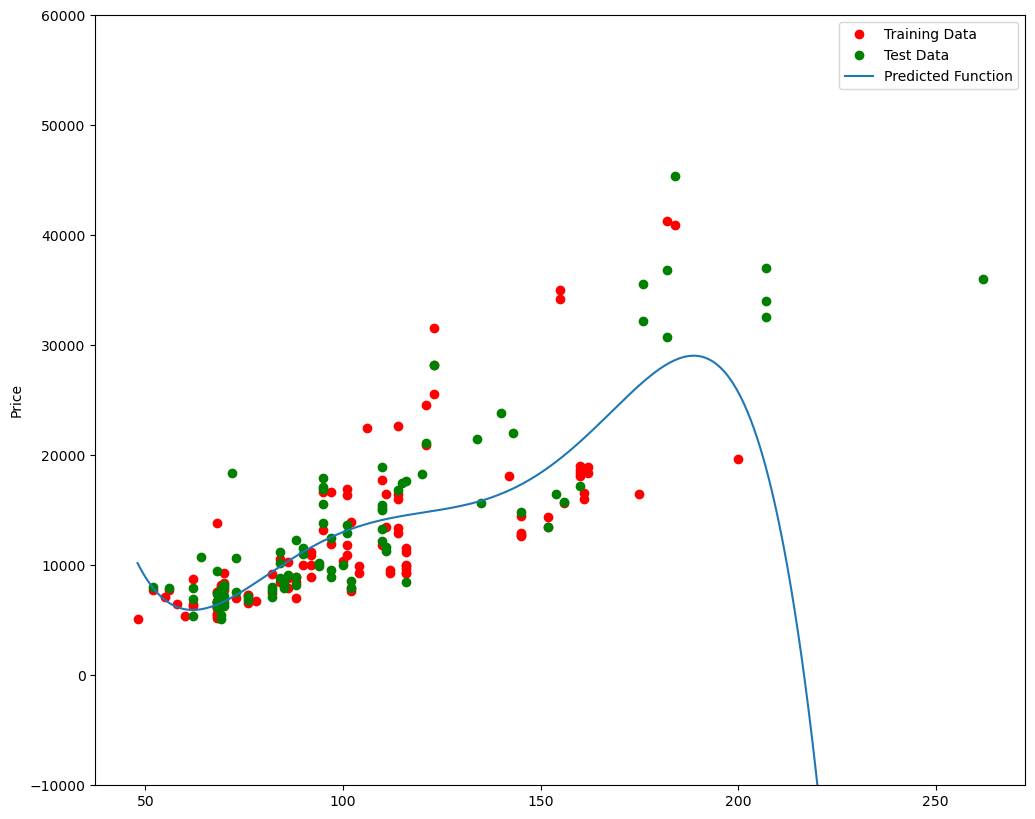

In [319]:
#use pollyplot to distplay the training data, testing data, and predicted function
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

The polynomial predicts the price in an acceptable range of error until around 200 horsepower where the price prediction diverges drastically.

In [320]:
#R^2 of the training data
poly.score(x_train_pr, y_train)

0.556852785391148

In [321]:
#R^2 of the test data
poly.score(x_test_pr, y_test)

-29.81555897187338

The extremely low value of R^2 for the test data is a sign of overfitting.

Let us compare R^2 for polynomials of different orders.

Text(3, 0.75, 'Maximum R^2 ')

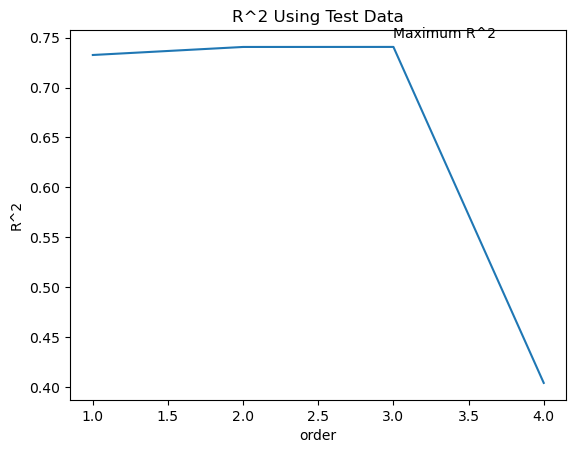

In [322]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    lr = LinearRegression()
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

The polynomials have a high R^2 until the value of 3 from whee R^2 drops. the third order polynomial is the optimal solution.

Let us define another function which creates separate training and testing datasets from an input dataset, creates a model and fits a polyomial of the given order, and plots using the polllyplot function we defined earlier.

In [323]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [324]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

Next let us create a polynomial of the second degree and use it.

In [342]:
pr1 = PolynomialFeatures(degree = 2)

In [343]:
x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [344]:
x_train_pr1.shape

(110, 15)

In [345]:
poly1 = LinearRegression().fit(x_train_pr1, y_train)

C:\Users\e.mwenda\AppData\Local\Temp\ipykernel_10960\1421651474.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\e.mwenda\AppData\Local\Temp\ipykernel_10960\1421651474.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax

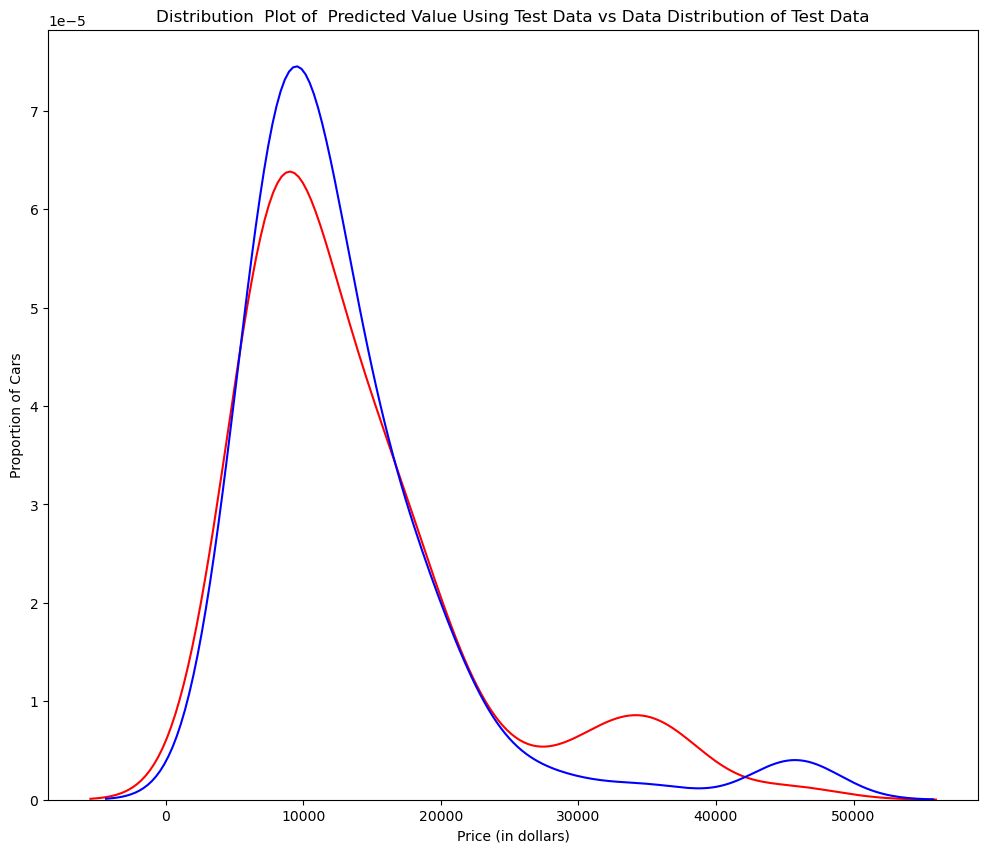

In [330]:
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

The model has  higher predicted value for cars around the 10,000 range and a lower predicted value between the 30,000 and 40,000 range. Thus the model is not accurate at these two ranges.

## Ridge Regression
We will use ridge regression to see how parameter alpha changes the model.

In [347]:
#we start by creating a polynomial of order 2 aand performing a polynomial transformation on our data.
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [348]:
#create a ridge regression object and set alpha to 0.1
RidgeModel = Ridge(alpha = 1)

In [349]:
#fit the model using the .fit method
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [350]:
#Obtain a prediction using .predict method
yhat = RidgeModel.predict(x_train_pr)

In [351]:
#Compare the first 5 perdicted values with actual values
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [[13438.72275633]
 [17420.03344358]
 [ 6196.27980182]
 [19482.57096637]]
test set : [[ 6295.]
 [10698.]
 [13860.]
 [13499.]]


In [352]:
#we use a foor loop to try different values of alpha and select the one that minimizes test error

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:13<00:00, 75.63it/s, Test Score=0.564, Train Score=0.859]


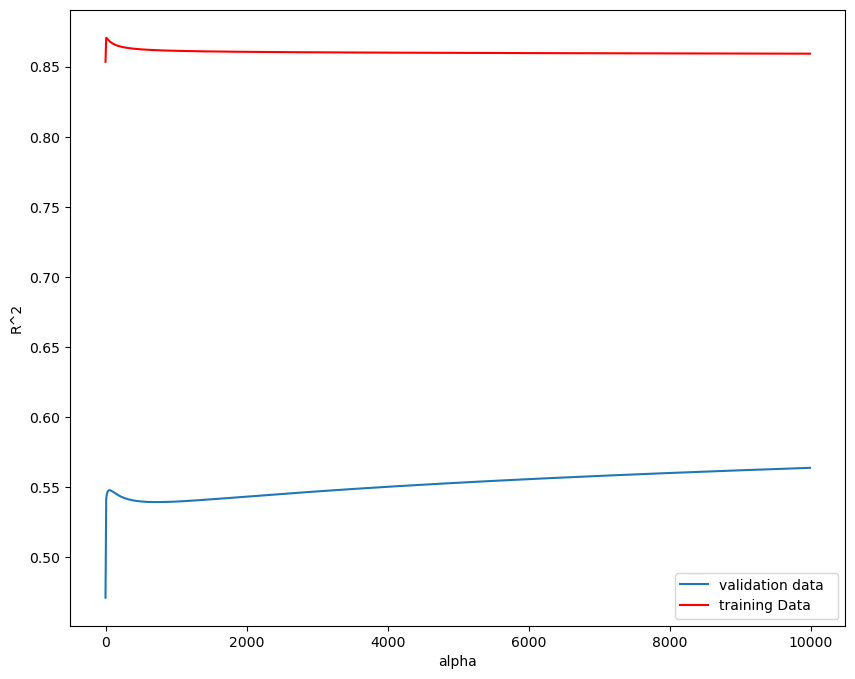

In [353]:
#we can plot the values of R^2 for differentalpha
width = 10
height = 8
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

As Alpha increases, the R^2 of the training data decreases whereas R^2 of the test data increases.

## Grid Search
Alpha is a hyperparameter. Sklearn uses the class GridSearhcCV to make the process of finding the best hyperparameter simpler.

In [339]:
#We can use grid search to simplify the process of finding the best hyperparameter.
#define parameters
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

#create a Ridge regression object
ridg = Ridge()

#create a ridge grid search object
grid1 = GridSearchCV(ridg, parameters1, cv = 4)

#fit the model
grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

#find the best alpha parameter and assign it to a variable
bestridg = grid1.best_estimator_

#test our model on the test data
bestridg.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411781387793231

This is the best R^2 you valuebased on the alpha values provided in our dictionary parameters1.

## Conclusion
In this project, we imported a a dataset from the UCI repository and preprocessed it to make it suitable for our purpose, exploring different models to predict the price of cars based on the car features. In the exploratory data analysis phase, we used visualization, pearson's coefficient, and analysis of variance(ANOVA) to determine variables that were suitable predictors of price: engine size, highway-mpg, wheelbase, horsepower, length, width, curb weight, engine size, bore, city-mpg, engine location, and drive wheels.
Then we developed a simple linear model, multiple linear model, and polynomial models. We evaluated these using R^2 and MSE to find the most suitable model. We also used cross validaton to test models on new datasets (i.e. not used for training the models).
We used Ridge Regression to experiment different values of Alpha hyperparameter, and used GridSearch to optimize the alpha parameter, settling on the best model within the parameters.

This project is up for review in the future. If you would like to see more of my projects, have a look at my [Github account](https://github.com/KinotiMwenda).

# Authored By:
#### Mwenda Kinoti